## Plotting with Matplotlib

Although UXarray’s primary plotting API leverages the HoloViz ecosystem, users may prefer to compose custom figures using Matplotlib and Cartopy. UXarray provides supplementary functionality to represent data in formats that can be interpreted by Matplotlib and Cartopy.

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.crs import PlateCarree

import uxarray as ux

In [3]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "outCSne30_vortex.nc"

uxds = ux.open_dataset(grid_path, data_path)

## Rasterization

UXarray enables conversion of face-centered data on unstructured grid into a regular two-dimensional grid suitable for display on a Cartopy GeoAxes.

Under the hood, each screen-space pixel is projected into geographic coordinates and tested against the grid to identify the enclosing face; the value of that face is then assigned to the corresponding pixel. The output is a raster array that integrates seamlessly with Matplotlib’s `imshow`, `contour` and `contourf` routines, preserving the chosen map projection and geographic extent.


### Displaying Rasterized Data with `ax.imshow()`

Because rasterization yields a fully georeferenced two-dimensional array, the quickest way to render it is with Matplotlib’s `Axes.imshow()` on a Cartopy GeoAxes. By supplying the raster array together with appropriate `origin` and `extent` parameters, Cartopy will handle projection and alignment automatically.


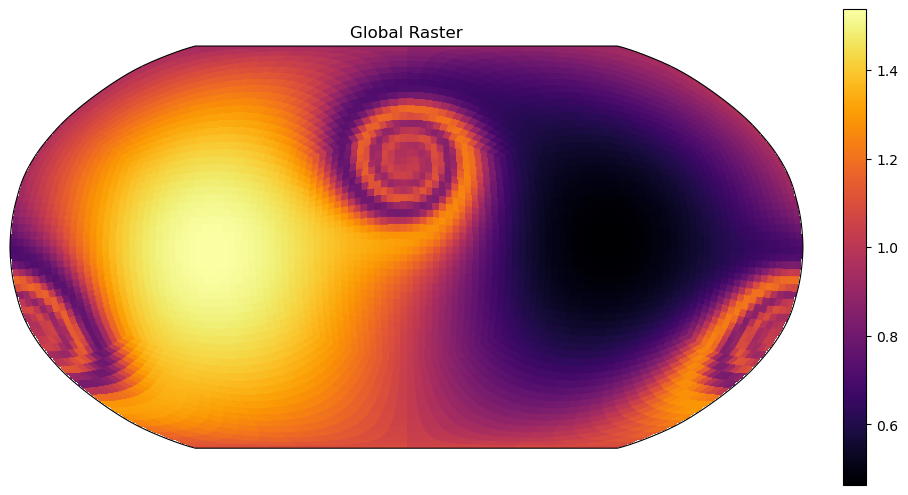

In [35]:
fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.Robinson()}, figsize=(9, 6), constrained_layout=True
)

ax.set_global()

raster = uxds["psi"].rasterize_to_geoaxes(ax=ax)
img = ax.imshow(
    raster, cmap="inferno", origin="lower", extent=ax.get_xlim() + ax.get_ylim()
)
ax.set_title("Global Raster")

cbar = fig.colorbar(img, ax=ax, fraction=0.03)

When you only need to visualize a subset of your data, such as a country, basin or smaller study area, limiting the extent of the Cartopy GeoAxes before rasterization can dramatically improve performance. By setting a tighter longitude–latitude window, the pixel‐to‐face lookups are constrained to that region, reducing the overall number of queries. This targeted sampling speeds up rendering, lowers memory overhead and produces a cleaner, more focused map of your area of interest.


Text(0.5, 1.0, 'Zoomed Raster')

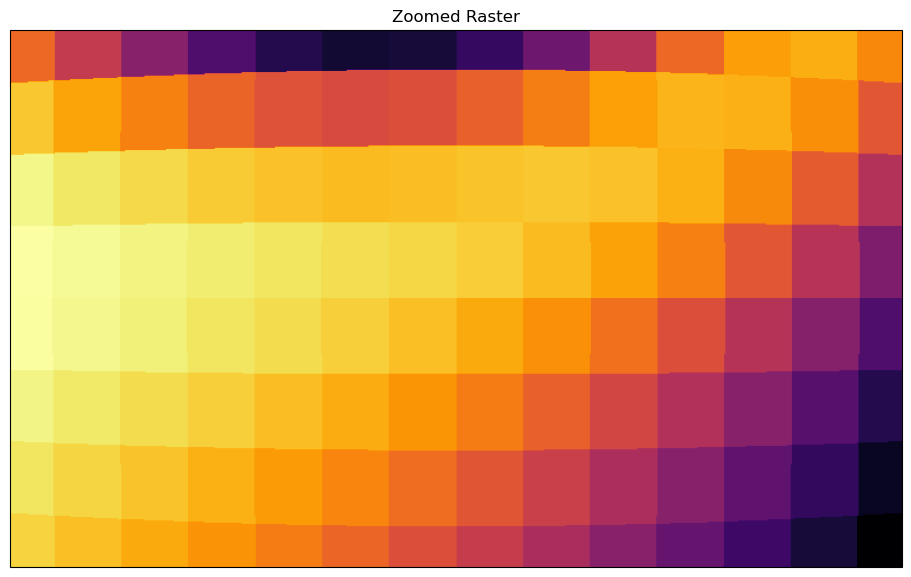

In [31]:
fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.Robinson()}, figsize=(9, 6), constrained_layout=True
)

ax.set_extent((-20, 20, -10, 10))


raster = uxds["psi"].rasterize_to_geoaxes(ax=ax)
ax.imshow(raster, cmap="inferno", origin="lower", extent=ax.get_xlim() + ax.get_ylim())
ax.set_title("Zoomed Raster")

### Viewing Contours with `ax.contour()` and `ax.contourf()`

You can use  `ax.contour()` to draw projection-aware isolines and `ax.contourf()` to shade between levels, specifying either a contour count or explicit thresholds.


Text(0.5, 1.0, 'Filled Contours')

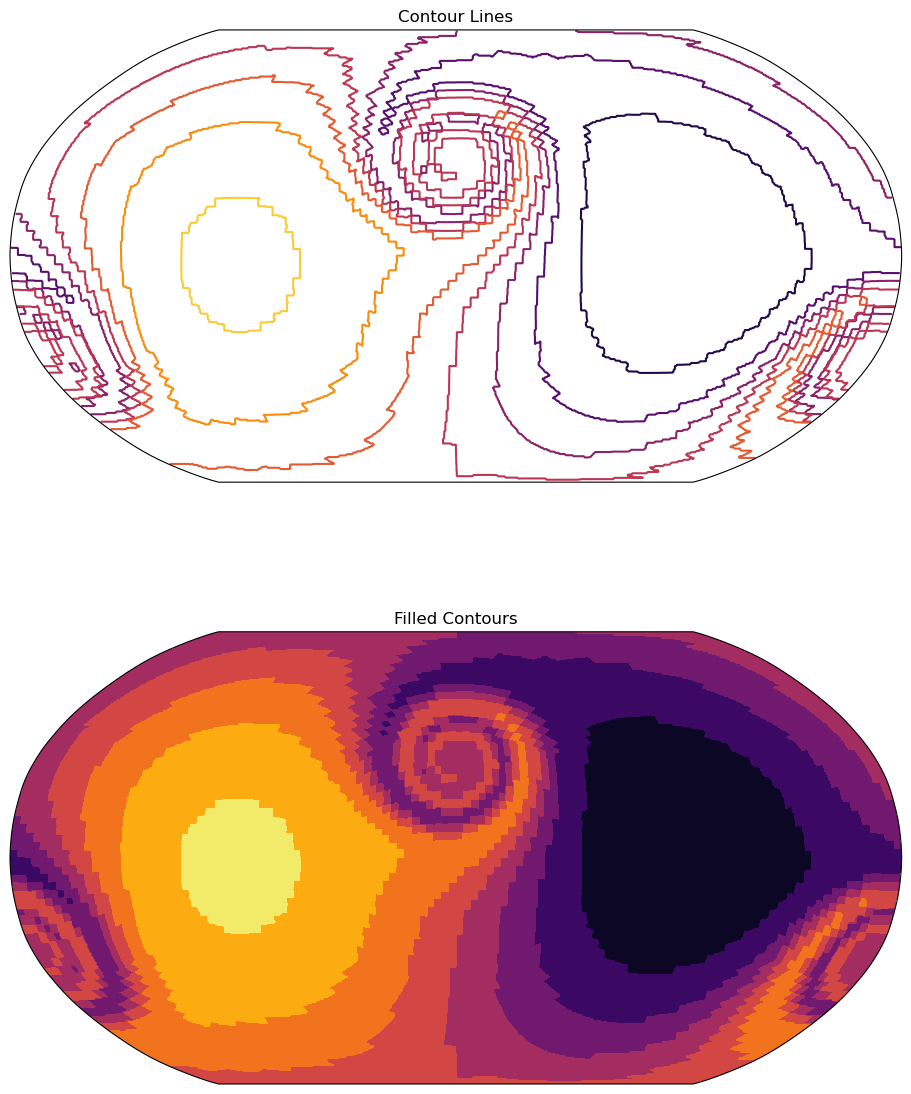

In [14]:
fig, axes = plt.subplots(
    2,
    1,
    subplot_kw={"projection": ccrs.Robinson()},
    constrained_layout=True,
    figsize=(9, 12),
)

ax1, ax2 = axes

ax1.set_global()
ax2.set_global()

raster = uxds["psi"].rasterize_to_geoaxes(ax=ax)

# Contour Lines
ax1.contour(
    raster, cmap="inferno", origin="lower", extent=ax.get_xlim() + ax.get_ylim()
)
ax1.set_title("Contour Lines")

# Filled Contours
ax2.contourf(
    raster, cmap="inferno", origin="lower", extent=ax.get_xlim() + ax.get_ylim()
)
ax2.set_title("Filled Contours")